<a href="https://colab.research.google.com/github/raqueeb/data_analyst/blob/main/Pivot_Table_Pandas_Titanic_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
titanic = pd.read_csv('https://github.com/raqueeb/data_analyst/raw/main/titanic_dataset.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   passengerid    1309 non-null   int64  
 1   pclass         1309 non-null   object 
 2   survived/died  1309 non-null   object 
 3   name           1309 non-null   object 
 4   sex            1309 non-null   object 
 5   age            1046 non-null   float64
 6   sibsp          1309 non-null   int64  
 7   parch          1309 non-null   int64  
 8   ticket         1309 non-null   object 
 9   fare           1308 non-null   float64
 10  cabin          295 non-null    object 
 11  embarked       1307 non-null   object 
 12  boat           486 non-null    object 
 13  body           121 non-null    float64
 14  home.dest      745 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 153.5+ KB


In [4]:
titanic.head()

,passengerid,pclass,survived/died,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,died,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,died,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic = titanic.drop(columns = "passengerid")

In [6]:
#Print the first 10 rows of data
titanic.head(10)

,pclass,survived/died,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,1st,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,died,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,died,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1st,Survived,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton,3,NaN,"New York, NY"
6,1st,Survived,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton,10,NaN,"Hudson, NY"
7,1st,died,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.000000,A36,Southampton,NaN,NaN,"Belfast, NI"
8,1st,Survived,"Appleton, Mrs. Edward Dale (Cha",female,53.0000,2,0,11769,51.479198,C101,Southampton,D,NaN,"Bayside, Queens, NY"
9,1st,died,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay"


In [7]:
titanic.drop(['ticket','cabin','boat','body'],inplace=True,axis=1)

In [8]:
titanic.head()

,pclass,survived/died,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1st,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.337494,Southampton,"St Louis, MO"
1,1st,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.550003,Southampton,"Montreal, PQ / Chesterville, ON"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.550003,Southampton,"Montreal, PQ / Chesterville, ON"
3,1st,died,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,151.550003,Southampton,"Montreal, PQ / Chesterville, ON"
4,1st,died,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,151.550003,Southampton,"Montreal, PQ / Chesterville, ON"


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         1309 non-null   object 
 1   survived/died  1309 non-null   object 
 2   name           1309 non-null   object 
 3   sex            1309 non-null   object 
 4   age            1046 non-null   float64
 5   sibsp          1309 non-null   int64  
 6   parch          1309 non-null   int64  
 7   fare           1308 non-null   float64
 8   embarked       1307 non-null   object 
 9   home.dest      745 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 102.4+ KB


In [10]:
#Look at all of the values in each column & get a count 
for val in titanic:
   print(titanic[val].value_counts())
   print()

3rd    709
1st    323
2nd    277
Name: pclass, dtype: int64

died        809
Survived    500
Name: survived/died, dtype: int64

Kelly, Mr. James                  2
Connolly, Miss. Kate              2
Franklin, Mr. Charles (Charles    1
Parker, Mr. Clifford Richard      1
Christy, Mrs. (Alice Frances)     1
                                 ..
Peters, Miss. Katie               1
Lamb, Mr. John Joseph             1
Attalah, Miss. Malake             1
McCoy, Mr. Bernard                1
Aronsson, Mr. Ernst Axel Algot    1
Name: name, Length: 1307, dtype: int64

male      843
female    466
Name: sex, dtype: int64

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
11.5000     1
26.5000     1
0.4167      1
70.5000     1
60.5000     1
Name: age, Length: 98, dtype: int64

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: in

In [11]:
#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [12]:
titanic.shape

(1044, 10)

#Pivot Table please check here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/


In [14]:
#Create a pivot table using the pivot_table function
table = pd.pivot_table(data=titanic,index=['sex'])
table

,age,fare,parch,sibsp
sex,,,,
female,28.576641,50.154934,0.665803,0.619171
male,30.585233,28.641019,0.278116,0.436170


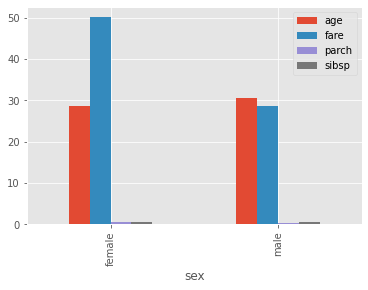

In [15]:
table.plot(kind='bar');

In [16]:
table = pd.pivot_table(data=titanic,index=['sex'], aggfunc = np.mean)
table

,age,fare,parch,sibsp
sex,,,,
female,28.576641,50.154934,0.665803,0.619171
male,30.585233,28.641019,0.278116,0.436170


In [17]:
#Create a pivot table using the pivot_table function
table = pd.pivot_table(data=titanic,index=['sex'], aggfunc = np.median)
table

,age,fare,parch,sibsp
sex,,,,
female,27.0,26.0,0,0
male,28.0,13.0,0,0


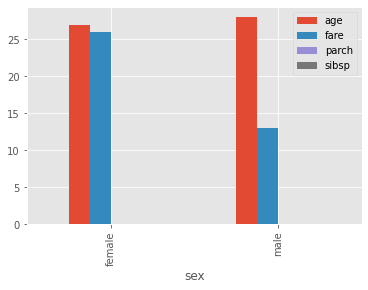

In [18]:
table.plot(kind='bar');

In [19]:
table = pd.pivot_table(titanic,index=['sex','embarked'])
table

age       fare     parch     sibsp
sex    embarked                                             
female Cherbourg    31.224490  86.723429  0.520408  0.510204
       Queenstown   25.458333  15.935246  0.250000  0.125000
       Southampton  27.877210  39.691146  0.757576  0.704545
male   Cherbourg    33.284357  60.224785  0.342105  0.342105
       Queenstown   31.557692  15.878846  0.230769  0.884615
       Southampton  29.942407  22.318518  0.266409  0.434363

In [20]:
table = pd.pivot_table(titanic,index=['sex','embarked'], aggfunc = np.mean)
table

age       fare     parch     sibsp
sex    embarked                                             
female Cherbourg    31.224490  86.723429  0.520408  0.510204
       Queenstown   25.458333  15.935246  0.250000  0.125000
       Southampton  27.877210  39.691146  0.757576  0.704545
male   Cherbourg    33.284357  60.224785  0.342105  0.342105
       Queenstown   31.557692  15.878846  0.230769  0.884615
       Southampton  29.942407  22.318518  0.266409  0.434363

In [21]:
#create a pivot table with multiple indices
table = pd.pivot_table(titanic,index=['sex','embarked'], aggfunc = np.median)
table

age       fare  parch  sibsp
sex    embarked                                  
female Cherbourg    30.0  58.689600      0      0
       Queenstown   24.0   7.750000      0      0
       Southampton  27.0  22.512500      0      0
male   Cherbourg    30.0  29.700001      0      0
       Queenstown   30.0   7.825000      0      0
       Southampton  28.0  12.475000      0      0

In [22]:
#different aggregate functions
table = pd.pivot_table(titanic,index=['sex','pclass'],aggfunc={'age':np.mean, 'survived/died':np.size}) 
table

age  survived/died
sex    pclass                          
female 1st     36.839695            131
       2nd     27.499191            103
       3rd     22.185307            152
male   1st     41.029250            151
       2nd     30.815401            158
       3rd     25.962273            349

In [23]:
table = pd.pivot_table(data=titanic,index=['pclass'], columns = ['embarked'],values = ['fare'],aggfunc=[np.sum])
table

sum                          
                  fare                          
embarked     Cherbourg  Queenstown   Southampton
pclass                                          
1st       14120.887725  270.000000  11642.250141
2nd         592.879107   59.087502   5052.199999
3rd         650.754701  466.208400   5322.686445

#Import Titanic Dataset from Seaborn
Below we follow the Pivot Table section from

[Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#scrollTo=nSv8WDnN_91-)


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Pivot Table using groupby

In [26]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [27]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [28]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [29]:
titanic.groupby(['sex', 'class','embarked'])['survived'].aggregate('mean')

sex     class   embarked
female  First   C           0.976744
                Q           1.000000
                S           0.958333
        Second  C           1.000000
                Q           1.000000
                S           0.910448
        Third   C           0.652174
                Q           0.727273
                S           0.375000
male    First   C           0.404762
                Q           0.000000
                S           0.354430
        Second  C           0.200000
                Q           0.000000
                S           0.154639
        Third   C           0.232558
                Q           0.076923
                S           0.128302
Name: survived, dtype: float64

In [30]:
titanic.groupby(['sex', 'class','embarked'])['survived'].aggregate('mean').unstack()

embarked              C         Q         S
sex    class                               
female First   0.976744  1.000000  0.958333
       Second  1.000000  1.000000  0.910448
       Third   0.652174  0.727273  0.375000
male   First   0.404762  0.000000  0.354430
       Second  0.200000  0.000000  0.154639
       Third   0.232558  0.076923  0.128302

#Set up Pivot Tables using pivot_table

In [31]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [32]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [33]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', 'age'], 'class')

class         First  Second  Third
sex    age                        
female 0.75     NaN     NaN   1.00
       1.00     NaN     NaN   1.00
       2.00     0.0     1.0   0.25
       3.00     NaN     1.0   0.00
       4.00     NaN     1.0   1.00
...             ...     ...    ...
male   70.00    0.0     0.0    NaN
       70.50    NaN     NaN   0.00
       71.00    0.0     NaN    NaN
       74.00    NaN     NaN   0.00
       80.00    1.0     NaN    NaN

[145 rows x 3 columns]

In [34]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

In [35]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 8.662]            ... (26.0, 512.329]          
class                     First     Third  ...          Second     Third
sex    age                                 ...                          
female (0, 18]              NaN  0.700000  ...             1.0  0.111111
       (18, 80]             NaN  0.523810  ...             1.0  0.125000
male   (0, 18]              NaN  0.166667  ...             0.8  0.052632
       (18, 80]             0.0  0.127389  ...             0.0  0.500000

[4 rows x 8 columns]

#Additional pivot table options
The full call signature of the pivot_table method of DataFrames is as follows:

call signature as of Pandas 0.18



DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

In [36]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [37]:
titanic.pivot_table('survived', index='sex', columns='class', margins=False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [38]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838
